In [44]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# Question 1

In [2]:
# Import the dataset
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
# Drop the date column
df = df.drop(columns=['date'])

In [4]:
# Print out all the unique elements for each of the categorical attributes
categorical_attributes = ['day', 'quarter', 'department', 'team']

for attribute in categorical_attributes:
    print(f'Unique elements for {attribute}:', df[attribute].unique())

Unique elements for day: ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
Unique elements for quarter: ['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']
Unique elements for department: ['sweing' 'finishing ' 'finishing']
Unique elements for team: [ 8  1 11 12  6  7  2  3  9 10  5  4]


**There are no duplicated items.**

In [5]:
# Create another column named `satisfied` that records the productivity performance.
df['satisfied'] = df['actual_productivity'] >= df['targeted_productivity']

In [6]:
# Drop the columns `actual_productivity` and `targeted_productivity`.
df = df.drop(columns=['actual_productivity', 'targeted_productivity'])

In [7]:
# Fill empty values with 0
df = df.fillna(0)

# Question 2

In [8]:
# Encode categories for each categorical attribute
df_2 = df.copy()
for attribute in categorical_attributes:
    le = LabelEncoder()
    df_2[attribute] = le.fit_transform(df_2[attribute])

In [9]:
# Split the data into training and testing set with the ratio of 80:20
X = df_2.drop(columns=['satisfied'])
y = df_2['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Build a Categorical Naïve Bayes classifier
classifier = CategoricalNB()
classifier.fit(X_train[categorical_attributes], y_train)
y_pred = classifier.predict(X_test[categorical_attributes])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.48      0.19      0.27        63
        True       0.76      0.93      0.84       177

    accuracy                           0.73       240
   macro avg       0.62      0.56      0.55       240
weighted avg       0.69      0.73      0.69       240



# Question 3

In [11]:
# For each of the **categorical attribtues**, encode them with **one-hot encoding**
df3 = df.copy()
df3 = pd.get_dummies(df3, columns=categorical_attributes)

In [12]:
# Define features (X) and target variable (y)
X = df3.drop(columns=['satisfied'])
y = df3['satisfied']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing set with the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Build SVM with linear kernel
# Takes around 2-3 min
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

       False       0.75      0.19      0.30        63
        True       0.77      0.98      0.86       177

    accuracy                           0.77       240
   macro avg       0.76      0.58      0.58       240
weighted avg       0.77      0.77      0.72       240



In [14]:
# Build SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        63
        True       0.74      1.00      0.85       177

    accuracy                           0.74       240
   macro avg       0.37      0.50      0.42       240
weighted avg       0.54      0.74      0.63       240



/home/random01/anaconda3/envs/ecs171/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/random01/anaconda3/envs/ecs171/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/random01/anaconda3/envs/ecs171/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [15]:
# For the column `satisfied` in our **training set**, please **print out** the frequency of each class. 
print(y_train.value_counts())

satisfied
True     698
False    259
Name: count, dtype: int64


In [21]:
# Oversample the **training data**
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [24]:
# For the column `satisfied` in the oversampled data, **print out** the frequency of each class  again.
print(y_resampled.value_counts())

satisfied
True     698
False    698
Name: count, dtype: int64


In [25]:
# Re-build the 2 SVMs with the same setting you have in Exercise 3.2, but **use oversampled training data** instead.
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_resampled, y_resampled)
y_pred_linear = svm_linear.predict(X_test)

print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

       False       0.49      0.52      0.51        63
        True       0.83      0.81      0.82       177

    accuracy                           0.73       240
   macro avg       0.66      0.67      0.66       240
weighted avg       0.74      0.73      0.74       240



In [26]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_resampled, y_resampled)
y_pred_rbf = svm_rbf.predict(X_test)

print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

       False       0.35      0.56      0.43        63
        True       0.80      0.64      0.71       177

    accuracy                           0.62       240
   macro avg       0.58      0.60      0.57       240
weighted avg       0.68      0.62      0.64       240



# Question 4

In [31]:
# Import the data
df4 = pd.read_csv("bitstrings.csv")
df4.head()

,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
4,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0


In [48]:
# Cluster the dataset with k-means, but with the number 60
X = df4

k = 60
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)
cluster_labels_5 = cluster_labels

/home/random01/anaconda3/envs/ecs171/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
# Calculate and report the Akaike Information Criterion
n_samples, n_features = X.shape
aic = kmeans.inertia_ + 2 * n_features
aic # ?? is this correct?

1266.7222227802017

In [34]:
# Show the frequency (number of members) of each cluster
cluster_freq = np.bincount(cluster_labels)
cluster_freq

array([  8,  11,  10,  20,  97, 100,   9,  84,   8,  14,  11,  19,  20,
        41,  13,  17,  17,  16,  33,  14,  12,  47,  20,  15,  23,  17,
        16,  18,  24,  13,   9,  11,  10,  10,  11,  32,  13,  18,  49,
        19,  16,   8,  13,  12,   9,  12,  12,  11,  34,  12,  13,   8,
        11,   8,  13,   8,  14,  12,  12,  13])

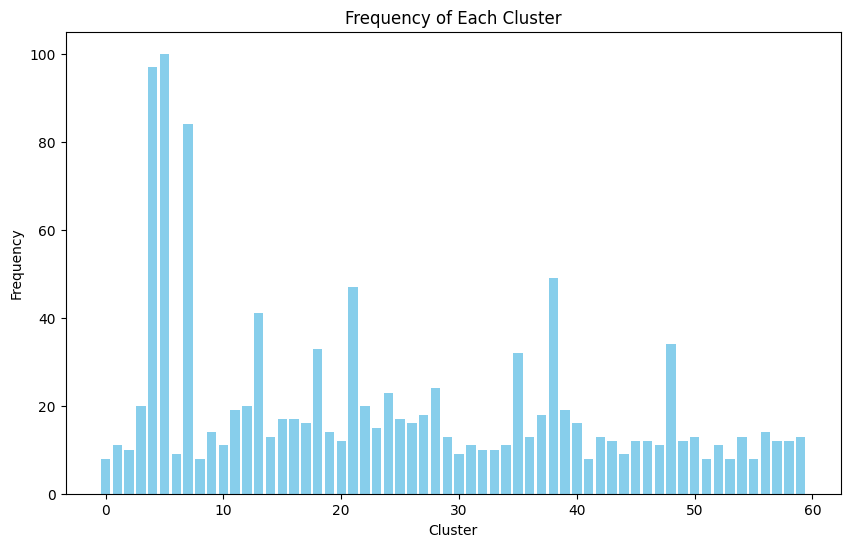

In [35]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(k), cluster_freq, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Each Cluster')
plt.show()

**4.2: K-means is a type of partional clustering while Agglomerative is a type of hierarchical clustering. K-means works by initializing K number of means associated with random points and then mininimizing the distance between points and means through iterations of updating means reassigning points to closest mean. Agglomerative works by initializing all points as one cluster and merging it iteratively. The reason for the different clustering algorithms is because there is no one size fits all. There are cases where one is more appropriate than the other.**

In [40]:
# Re-do the k-means clustering on our dataset again, but this time we only consider ```k=2```.
X = df4

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

/home/random01/anaconda3/envs/ecs171/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
# Calculate and report the Akaike Information Criterion.
n_samples, n_features = X.shape
aic = kmeans.inertia_ + 2 * n_features
aic # ?? is this correct?

3884.4681122448956

In [42]:
# Show the frequency(number of members) of each cluster.
cluster_freq = np.bincount(cluster_labels)
cluster_freq

array([416, 784])

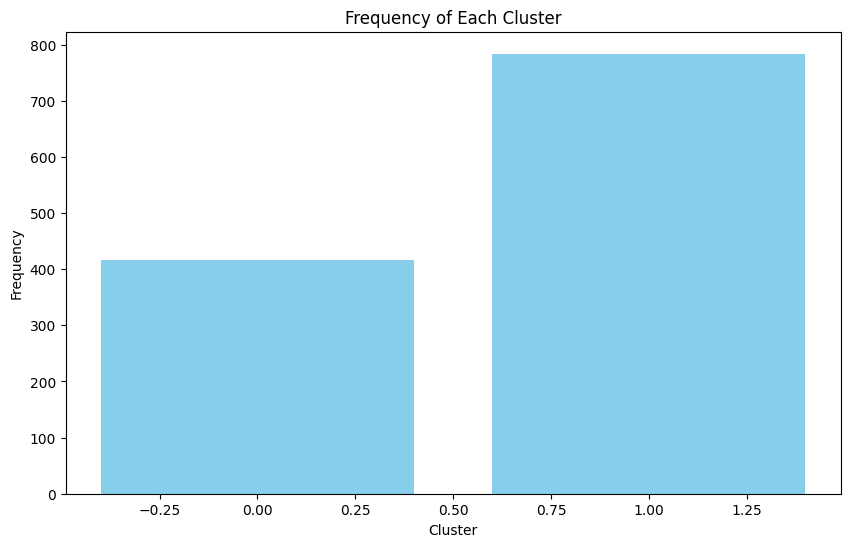

In [43]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(k), cluster_freq, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Each Cluster')
plt.show()

**This is probably not a better model because with only 2 means, we are likely underfitting the data.**

# Question 5

In [46]:
# Retrieve the projected dataset with PCA, using ```n_components=2```.
pca = PCA(n_components=2)
df4_pca = pca.fit_transform(df4)

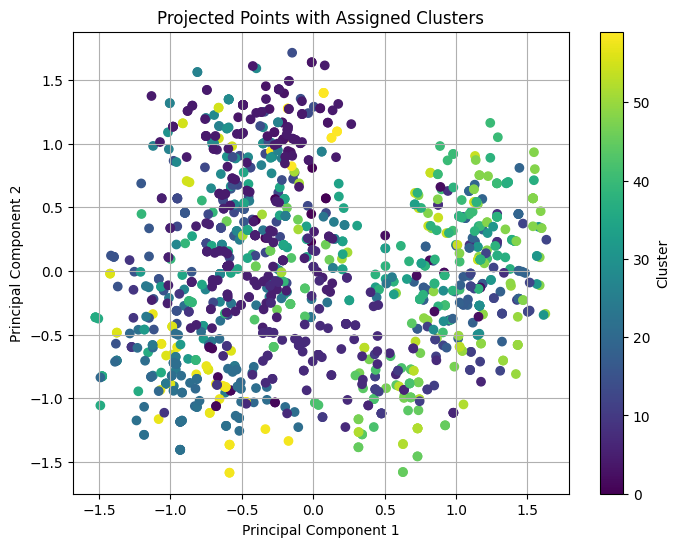

In [49]:
# Generate a scatter plot to visualize the projected points, where they should be colored differently based on the assigned cluster based on exercise 4.1
cluster_assignments = cluster_labels_5

plt.figure(figsize=(8, 6))
plt.scatter(df4_pca[:, 0], df4_pca[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('Projected Points with Assigned Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [51]:
# In the first principal component, **print out** the weights of all features.
weights_first_component = pca.components_[0]

for feature, weight in zip(df4.columns, weights_first_component):
    print(f"Feature: {feature}, Weight: {weight}")

Feature: b15, Weight: 0.32145371786888677
Feature: b14, Weight: -0.3060394876858539
Feature: b13, Weight: -0.10218068359225353
Feature: b12, Weight: 0.027010113825982375
Feature: b11, Weight: -0.0004938480480162578
Feature: b10, Weight: -0.25098697908190626
Feature: b9, Weight: -0.41278564945580193
Feature: b8, Weight: -0.41369131587485414
Feature: b7, Weight: 0.34530165824190523
Feature: b6, Weight: 0.2530406063228802
Feature: b5, Weight: -0.11677773596518327
Feature: b4, Weight: -0.047109948484572624
Feature: b3, Weight: -0.19344884481166624
Feature: b2, Weight: -0.012785056440497279
Feature: b1, Weight: -0.0065776920142509914
Feature: b0, Weight: 0.3880223529126693


In [52]:
# Report which feature has the **highest positive** weight in the first principal component.
index_highest_weight = weights_first_component.argmax()
feature_with_highest_weight = df4.columns[index_highest_weight]

print(f"The feature with the highest positive weight in the first principal component is: {feature_with_highest_weight}")

The feature with the highest positive weight in the first principal component is: b0
